## План работы <a id = "plan"> </a>

[1. Подготовка данных](#1.)<br>
[1.1. Откроем и изучим данные](#1.1.)<br>
[1.2. Проведем предобработку данных](#1.2.)<br>
[2. Обучение моделей и подбор гиперпараметров](#2.)<br>
[3. Финальный анализ моделей](#3.)<br>

# 1. Подготовка данных <a id = "1."> </a>

[Вернуться к плану работы](#plan)

## 1.1. Откроем и изучим данные <a id = "1.1."> </a>

[Вернуться к плану работы](#plan)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') 
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
%matplotlib inline

data_arc = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\Final project\final_steel\data_arc.csv')
data_bulk = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\Final project\final_steel\data_bulk.csv')
data_bulk_time = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\Final project\final_steel\data_bulk_time.csv')
data_gas = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\Final project\final_steel\data_gas.csv')
data_temp = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\Final project\final_steel\data_temp.csv')
data_wire = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\Final project\final_steel\data_wire.csv')
data_wire_time = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\Final project\final_steel\data_wire_time.csv')

def hist(data, c, t, b):
    '''Функция строит гистрограмму.
    
    Args:
        data(DataFrame): Выбранный датасет.
        с(str): Название колонки датасета.
        t(str): Название гистограммы.
        b(int): Количество корзин.
    '''
    plt.figure(figsize=(15, 10))
    plt.title(t, fontsize=15)
    sns.distplot(data[c], bins=b, kde=True)

def box_plt(data, c, t):
    '''Функция строит диаграмму ящик с усами.
    
    Args:
        data(DataFrame): Выбранный датасет.
        с(str): Название колонки датасета.
        t(str): Название диаграммы.
    '''
    plt.figure(figsize=(15,10))
    sns.boxplot(data = data[c])
    plt.title(t, fontsize=15)
    plt.grid(True)
    plt.show()

В работе мы будем использовать следующие датасеты:<br>
- data_arc.csv — данные об электродах; <br>
- data_bulk.csv — данные о подаче сыпучих материалов (объём);<br>
- data_bulk_time.csv — данные о подаче сыпучих материалов (время);<br>
- data_gas.csv — данные о продувке сплава газом;<br>
- data_temp.csv — результаты измерения температуры;<br>
- data_wire.csv — данные о проволочных материалах (объём);<br>
- data_wire_time.csv — данные о проволочных материалах (время).<br>

Согласно условию во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

### data_arc.csv

In [2]:
def data_info(data):
    '''Функция выводит информацию о датасете, первые 10 строк датасета и информацию о дубликатах.
    
    Args:
        data(DataFrame): Выбранный датасет.   
    '''
    data.info()
    display(data.head(10))
    print('Количество дубликатов в данных:', data.duplicated().sum())
    
data_info(data_arc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


Количество дубликатов в данных: 0


Датасет data_arc размером в 14876 строк содержит 5 колонок и данные 3-х типов: float64, int64, object. В датасете отсутствуют дубликаты и пропуски. Приведем колонки с началом и концом нагрева дугой к типу данных datetime, для того, чтобы проанализировать временной промежуток.

In [3]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])

Проанализируем временной промежуток для этих колонок.

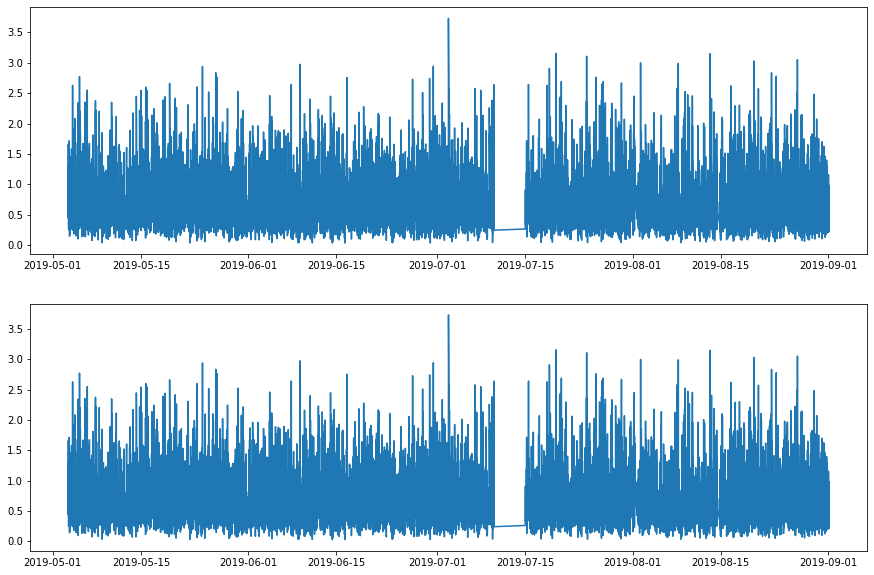

In [4]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
ax[0].plot(data_arc['Начало нагрева дугой'], data_arc['Активная мощность'])
ax[1].plot(data_arc['Конец нагрева дугой'], data_arc['Активная мощность'])
plt.show()

Из графиков мы видим, что данные охватывают промежуток длительностью в 4 месяца с мая 2019 по конец августа 2019. Проанализируем распределения активной и реактивной мощности.

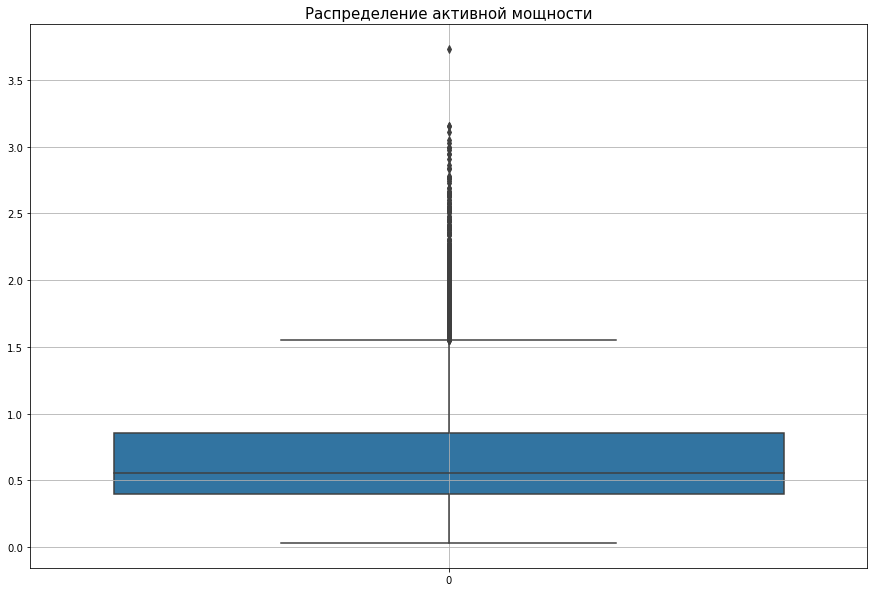

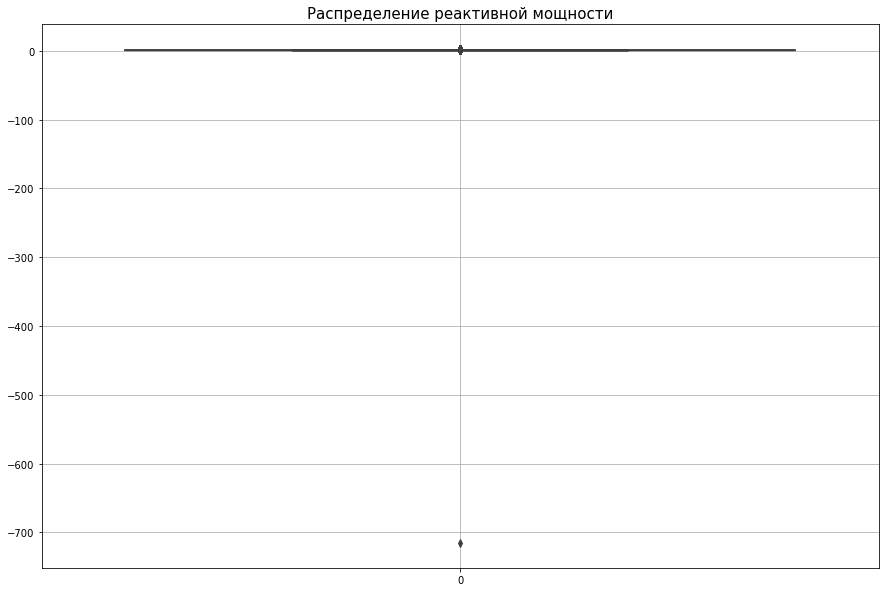

In [5]:
box_plt(data_arc, 'Активная мощность', 'Распределение активной мощности')
box_plt(data_arc, 'Реактивная мощность', 'Распределение реактивной мощности')

Распределения содержат выбросы. Сверх аномальный выброс с отрицательным значением содержится у данных по реактивной мощности. Вероятно это связано с ошибкой в работе оборудования или при экспорте данных. Очистим данные от выброса с отрицательным значением.

In [6]:
data_arc = data_arc[data_arc['Реактивная мощность'] >= 0]

In [7]:
def unique_values(data, c):
    '''Функция считает число уникальных значений в колонке.
    
    Args:
        data(DataFrame): Выбранный датасет.
        с(str): Название колонки датасета.
    '''
    print('Количество уникальных значений в кололонке', c ,':', len(data[c].unique()))

unique_values(data_arc, 'key')   

Количество уникальных значений в кололонке key : 3214


Проверим корреляцию таких признаков как активная и реактивная мощность.

In [8]:
print('Корреляция активной и реактивной мощности', data_arc['Активная мощность'].corr(data_arc['Реактивная мощность']))

Корреляция активной и реактивной мощности 0.9631819131519802


<Figure size 1080x720 with 0 Axes>

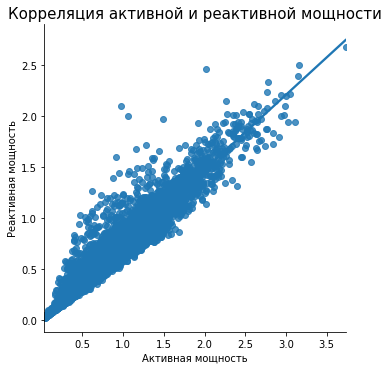

In [9]:
plt.figure(figsize=(15,10))
sns.lmplot(x='Активная мощность', y='Реактивная мощность', data=data_arc)
plt.title('Корреляция активной и реактивной мощности', fontsize=15)
plt.show()

Мы наблюдаем такое явление, как мультиколлинеарность - когда факторы модели очень сильно друг с другом коррелируют. Это может стать причиной переобучаемости модели, что приведет к неверному результату. 

### data_bulk.csv

In [10]:
data_info(data_bulk)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


Количество дубликатов в данных: 0


Датасет data_bulk размером в 3129 строк содержит 16 колонок и данные 2-х типов: float64, int64. В датасете отсутствуют дубликаты, но есть множество пропусков. Пропуски вероятно связаны с разницей в подаче различных сыпучих материалов.

In [11]:
unique_values(data_bulk, 'key')   

Количество уникальных значений в кололонке key : 3129


### data_bulk_time.csv

In [12]:
data_info(data_bulk_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


Количество дубликатов в данных: 0


Датасет data_bulk_time размером в 3129 строк содержит 16 колонок и данные 2-х типов: int64, object. В датасете отсутствуют дубликаты, но есть множество пропусков. Пропуски вероятно связаны с разницей в подаче различных сыпучих материалов. В дальнейшем обучении и предобработке данные использовать не будем.

In [13]:
unique_values(data_bulk_time, 'key') 

Количество уникальных значений в кололонке key : 3129


### data_gas.csv

In [14]:
data_info(data_gas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


Количество дубликатов в данных: 0


Датасет data_gas размером в 3129 строк содержит 2 колонки и данные 2-х типов: float64, int64. В датасете отсутствуют дубликаты и пропуски.

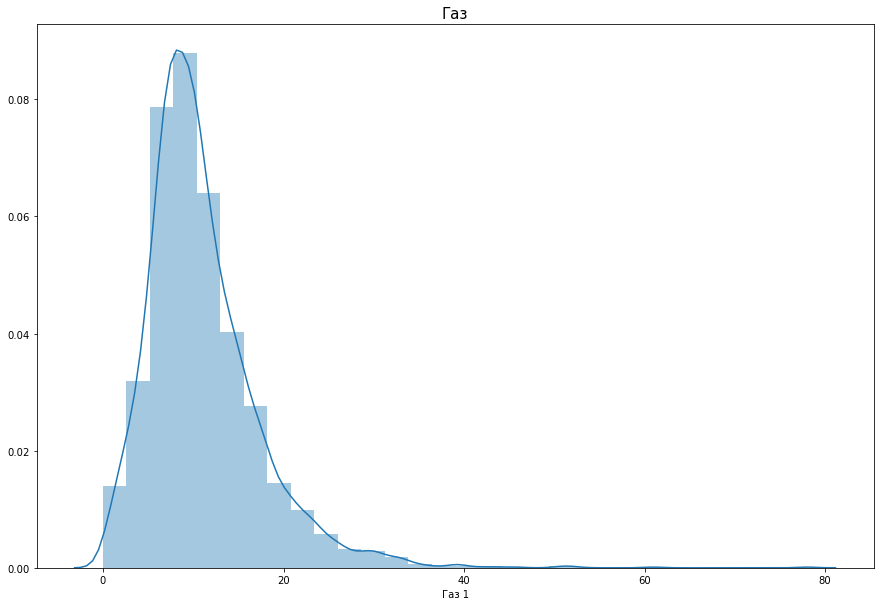

In [15]:
hist(data_gas, 'Газ 1', 'Газ', 30)

Распределение имеет вид близкий к нормальному со смещением влево.

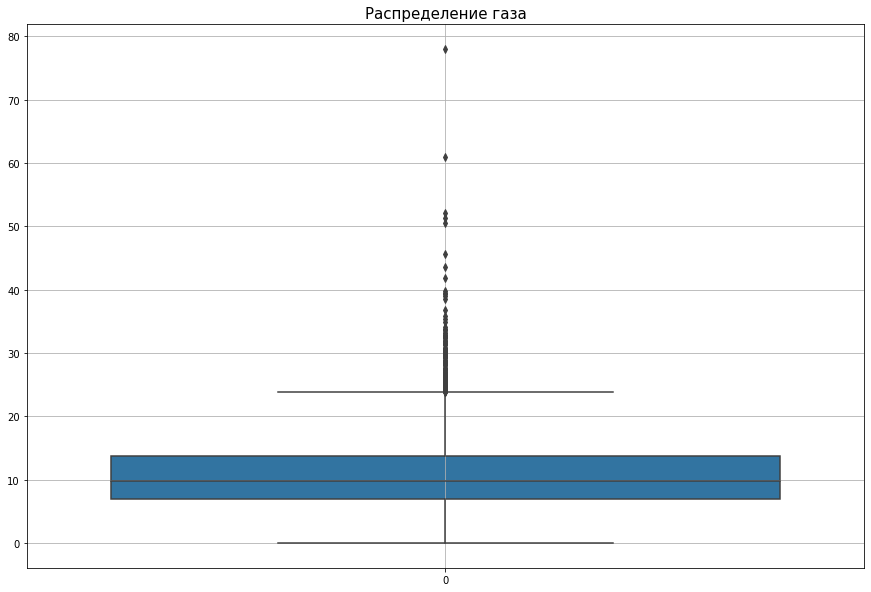

In [16]:
box_plt(data_gas, 'Газ 1', 'Распределение газа')

Данные содержат выбросы, а именно аномально высокие значения. Очищать выбросы не будем.

In [17]:
unique_values(data_gas, 'key')

Количество уникальных значений в кололонке key : 3239


### data_temp.csv

In [18]:
data_info(data_temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


Количество дубликатов в данных: 0


Датасет data_temp размером в 15907 строк содержит 3 колонки и данные 3-х типов: float64, int64, object. В датасете отсутствуют дубликаты, но есть пропуски. Признак температура является целевым и модель должна будет предсказывать его. Приведем колонку с временем замера к типу данных datetime, для того, чтобы проанализировать временной промежуток.

In [19]:
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'])

Проанализируем временной промежуток.

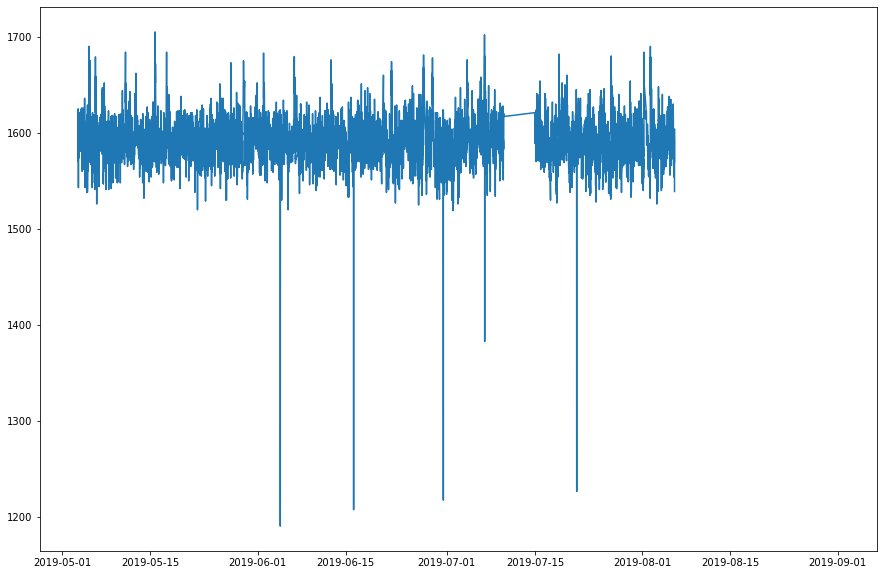

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(data_temp['Время замера'], data_temp['Температура'])
plt.show()

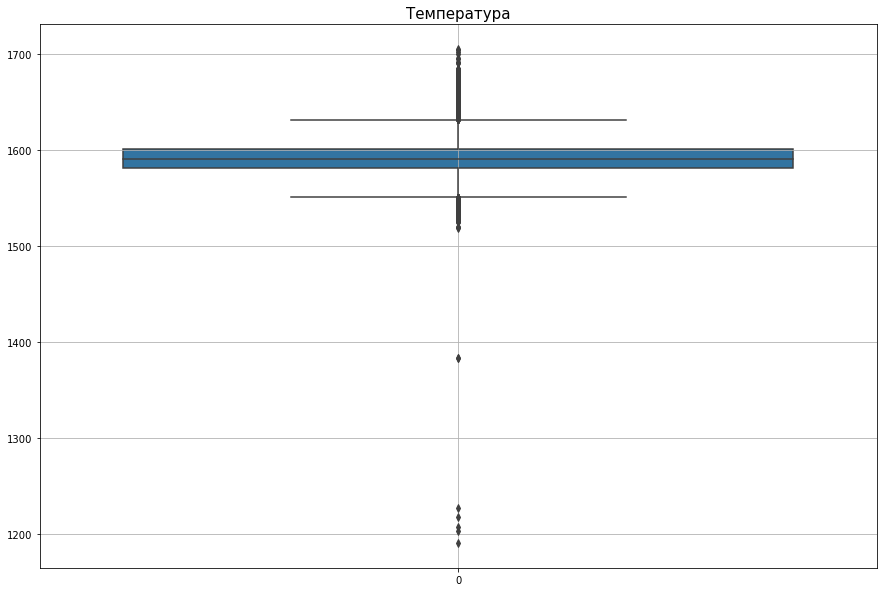

In [21]:
box_plt(data_temp, 'Температура', 'Температура')

В данных присутствуют выбросы, а именно аномально низкие и высокие значения температуры. Отсутствие промежутка данных может быть связано с их потерей при экспорте или поломкой датчика. Выбросы удалять не будем, а пропуски удалим на этапе предобработки данных.

In [22]:
unique_values(data_temp, 'key')

Количество уникальных значений в кололонке key : 3216


### data_wire.csv

In [23]:
data_info(data_wire)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количество дубликатов в данных: 0


Датасет data_wire размером в 3081 строку содержит 10 колонок и данные 2-х типов: float64, int64. В датасете отсутствуют дубликаты, но есть много пропусков. Вероятно они связаны с тем, что различные виды проволочных материалов поступали в разных пропорциях в разные промежутки времени.

In [24]:
unique_values(data_wire, 'key')

Количество уникальных значений в кололонке key : 3081


### data_wire_time.csv

In [25]:
data_info(data_wire_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Количество дубликатов в данных: 0


Датасет data_wire_time размером в 3081 строку содержит 10 колонок и данные 2-х типов: float64, int64. В датасете отсутствуют дубликаты, но есть много пропусков. Вероятно они связаны с тем, что различные виды проволочных материалов поступали в разных пропорциях в разные промежутки времени. В дальнейшем обучении и предобработке данные использовать не будем.

In [26]:
unique_values(data_wire_time, 'key')

Количество уникальных значений в кололонке key : 3081


### Вывод

Данные были загружены и изучены, проверены на пропуски и дубликаты. В некотрых датасетах колонки с датами и временем были приведены к типу datetime. Также данные были проверены на выбросы.

### 1.2. Проведем предобработку данных <a id = "1.2."> </a>

[Вернуться к плану работы](#plan)

Перед обучение моделей необходимо обработать и объединить данные.

### data_arc.csv

Создадим дополнительные признаки из уже имеющихся.

In [27]:
# определим время нагрева дугой
data_arc['Время нагрева дугой'] = data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']
data_arc['Время нагрева дугой'] = data_arc['Время нагрева дугой'].dt.seconds

# определим полную мощность
data_arc['Полная мощность'] = np.sqrt(data_arc['Активная мощность']**2 + data_arc['Реактивная мощность']**2)

# определим количество итераций нагрева
data_arc_c = data_arc.groupby(by = 'key', as_index = False).count()[['key', 'Начало нагрева дугой']]
data_arc_c.columns = ['key', 'Количество итераций нагрева']

Сгруппируем данные по партии и просуммируем значения.

In [28]:
# сгруппируем данные по партиям
data_arc = data_arc.groupby(by = 'key', as_index = False).sum()

# добавим информацию о количестве итераций нагрева по ключу key
data_arc = data_arc.merge(data_arc_c, how = 'left', on = 'key')

Так как признаки активная и реактивная мощность мультиколлинеарны будем использовать признак только полная мощность. 

In [29]:
data_arc = data_arc[['key', 'Полная мощность', 'Время нагрева дугой', 'Количество итераций нагрева']]

Проверим оставшиеся признаки на мультиколлинеарность.

<Figure size 800x640 with 0 Axes>

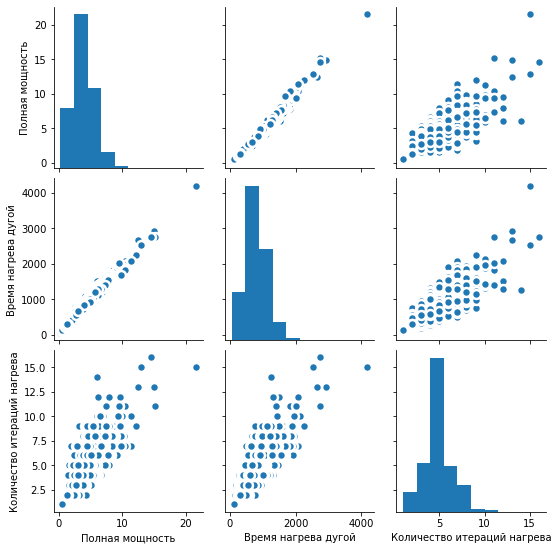

In [30]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data_arc[['Полная мощность', 'Время нагрева дугой', 'Количество итераций нагрева']], 
             kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [31]:
data_arc[['Полная мощность', 'Время нагрева дугой', 'Количество итераций нагрева']].corr()

,Полная мощность,Время нагрева дугой,Количество итераций нагрева
Полная мощность,1.000000,0.983356,0.737427
Время нагрева дугой,0.983356,1.000000,0.777533
Количество итераций нагрева,0.737427,0.777533,1.000000


Мультиколлинеарность также наблюдается на признаках время нагрева и полная мощность. При обучении модели мы не будем использовать в качестве признака Время нагрева дугой.

In [32]:
data_arc = data_arc[['key', 'Полная мощность', 'Количество итераций нагрева']]

### data_temp.csv

Очистим пропуски в данных.

In [33]:
data_temp = data_temp.dropna(subset=['Температура']).reset_index(drop=True)
data_temp = data_temp.sort_values(by=['Время замера'])

Удалим информацию о партиях по которым известно только одно измерение температуры.

In [34]:
count = data_temp.groupby(by = 'key', as_index = False).count()
one = count[count['Время замера'] == 1]['key'].tolist()
data_temp = data_temp.query('key not in @one')

Сгруппируем данные по партии по первым и последним значениям, последние значения необходимо будет предсказывать.

In [35]:
data_temp = data_temp.groupby(by = 'key').agg(['first', 'last']).reset_index()
data_temp.columns = data_temp.columns.droplevel()
data_temp.columns = ['key', 'Время замера 1', 'Время замера 2', 'Температура 1', 'Температура 2']
data_temp = data_temp[['key', 'Температура 1', 'Температура 2']]

In [36]:
display(data_temp.head(3))

,key,Температура 1,Температура 2
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0


### Объединение данных

Объединим все признаки в сводную таблицу, которую в дальнейшем передадим в модель на обучение.

In [37]:
# объединим обработанные датасеты по ключу key
data = (data_temp.merge(data_arc, how = 'left', on = 'key')
                 .merge(data_wire, how = 'left', on = 'key')
                 .merge(data_bulk, how = 'left', on = 'key')
                 .merge(data_gas, how = 'left', on = 'key')
       )

# заполним пропуски образовавшиеся после объединения таблиц нулями
data = data.fillna(0)

# переименуем столбцы для корректной работы lgbm
data = data.rename(columns={'Температура 1': 'Temp first',
                            'Температура 2': 'Temp last',
                            'Полная мощность': 'Full power',
                            'Количество итераций нагрева':'Heating iterations',
                            'Газ 1': 'Gas'})

# уберем колонку-индентификатор key, которую мы использовали
# для объединения датасетов
data = data.drop(['key'], axis = 1)

In [38]:
display(data)

,Temp first,Temp last,Full power,Heating iterations,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Gas
0,1571.0,1613.0,5.826395,5,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986
1,1581.0,1602.0,3.649216,4,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561
2,1596.0,1599.0,2.989534,5,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793
3,1601.0,1625.0,3.814962,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219
4,1576.0,1602.0,4.035758,4,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,1570.0,1591.0,3.986869,4,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,256.0,0.0,129.0,223.0,7.125735
2471,1554.0,1591.0,5.057033,6,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,256.0,0.0,129.0,226.0,9.412616
2472,1571.0,1589.0,2.885017,3,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0,6.271699
2473,1591.0,1594.0,4.143749,5,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0,14.953657


В результате объединения датасетов мы получили набор признаков и целевой признак. Объектом является одна партия стали. 

#### Веделим из данных обучающую и тестовую выборку

In [39]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size = .25, random_state = 42)

In [40]:
data_train.columns

Index(['Temp first', 'Temp last', 'Full power', 'Heating iterations', 'Wire 1',
       'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8',
       'Wire 9', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15', 'Gas'],
      dtype='object')

#### Масштабируем количественные признаки

В данных присутствуют колличественные признаки с разными разбросами значений. Для того, чтобы алгоритм не решил, что признаки с
большими значениями и разбросом важнее, маcштабируем количественные признаки.

In [41]:
from sklearn.preprocessing import MinMaxScaler

numeric = data.columns.tolist()
numeric = [e for e in numeric if e not in ('Temp last')]
scaler = MinMaxScaler()
scaler.fit(data_train[numeric])

# масштабируем обучающую выборку
data_train[numeric] = scaler.transform(data_train[numeric])

# масштабируем тестовую выборку
data_test[numeric] = scaler.transform(data_test[numeric])

### Вывод

Была проведена предобработка данных. Данные были объединены в одну сводную таблицу со всеми признаками по номеру партии. Нами были обработаны пропуски, а также выбросы. Выборка была разделена на обучающую и тестовую. Количественные признаки были масштабированы.

# 2. Обучение моделей и подбор гиперпараметров <a id = "2."> </a>

[Вернуться к плану работы](#plan)

Для проведения обучения и тестирования моделей мы выделим у обучающей и тестовой выборки признаки и целевой признак.

In [42]:
# разобьем данные обучающей выборки
features_data_train = data_train.drop(['Temp last'], axis = 1)
target_data_train = data_train['Temp last']
# разобьем данные тестовой выборки
features_data_test = data_test.drop(['Temp last'], axis = 1)
target_data_test = data_test['Temp last']

Для обучения мы будем использовать 3 вида моделей: LinearRegression, RandomForestRegressor и LGBMRegressor. Определим параметры моделей, которые показывают лучшую метрику MAE.

### LinearRegression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

def importance_bar(importance, labels):
    '''Функция строит график важности признаков.
    Args:
        importance(list): Важность признаков.
        labels(list): Названия признаков.
    '''
    df = pd.DataFrame.from_dict({'Features importance': importance,
                                'Labels':labels})
    df = df.sort_values(by='Features importance', ascending = False)
    df = df[df['Features importance'] > 0]
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(15,10))
    fig = sns.barplot(x='Features importance', y='Labels', 
                      data=df, color="b")
    plt.title('Важность признаков', fontsize=15)
    ax.set(xlabel='Важность признаков', 
           ylabel='Признаки')
    plt.show()

def lr_gridsearchcv(features, target):
    '''Функция рассчитывает и выдает словарь с лучшими гиперпараметрами 
    и лучшее значение метрики для модели линейной регрессии.
    
    Args:
        features(DataFrame): Признаки.
        target(DataFrame, Series): Целевой(ые) признак(и).
    '''
    model = LinearRegression()
    param_grid = {
        'fit_intercept' : [True, False],
    }
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv=3,  scoring = 'neg_mean_absolute_error')
    CV.fit(features, target)
    print('Лучшие гиперпараметры: ', CV.best_params_)
    print('Лучшее MAE {:.2f}'.format(-CV.best_score_))
    # строим график важности признаков
    importance_bar(CV.best_estimator_.coef_, features.columns.values)
    return CV.best_params_     

Подберем лучшие гиперпараметры для модели LinearRegression, оценим лучший показатель MAE и построим график важности признаков для модели с лучшими гиперпараметрами.

Лучшие гиперпараметры:  {'fit_intercept': True}
Лучшее MAE 8.17


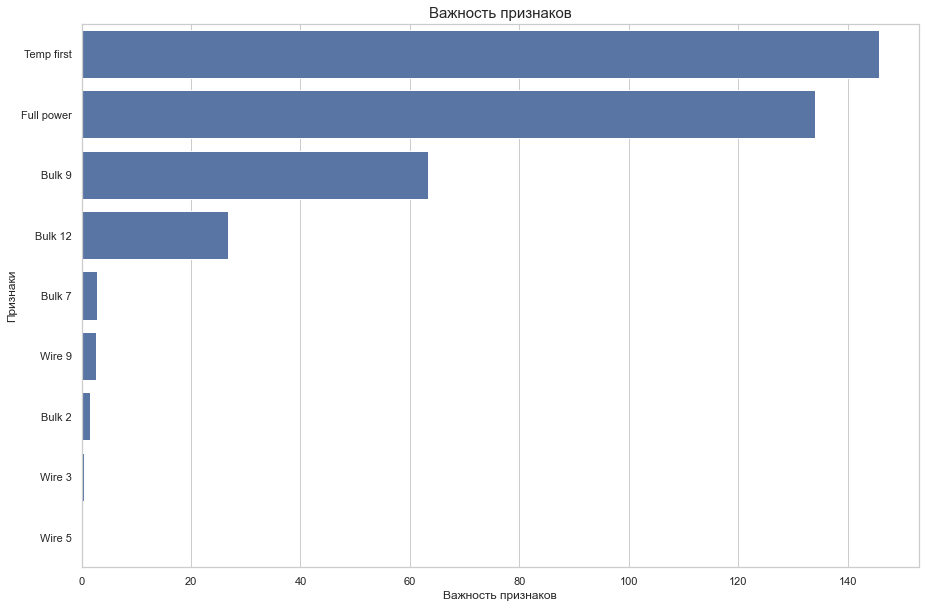

Wall time: 296 ms


In [44]:
%%time
best_params_lr = lr_gridsearchcv(features_data_train, target_data_train)

### RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

def rfr_gridsearchcv(features, target):
    '''Функция рассчитывает и выдает словарь с лучшими гиперпараметрами 
    и лучшее значение метрики для модели случайного леса регрессии.
    
    Args:
        features(DataFrame): Признаки.
        target(DataFrame, Series): Целевой(ые) признак(и).
    '''
    model = RandomForestRegressor()
    param_grid = {
        'random_state': [42],
        'n_estimators': range(1,201,20),
        'max_features': ['auto', 'sqrt', 'log2', None],
        'max_depth' : [range(1,15,1), None]
    }
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv=3,  scoring = 'neg_mean_absolute_error')
    CV.fit(features, target)
    print('Лучшие гиперпараметры: ', CV.best_params_)
    print('Лучшее MAE: {:.2f}'.format(-CV.best_score_))
    # строим график важности признаков
    importance_bar(CV.best_estimator_.feature_importances_, features.columns.values)
    return CV.best_params_ 

Подберем лучшие гиперпараметры для модели RandomForestRegressor, оценим лучший показатель MAE и построим график важности признаков для модели с лучшими гиперпараметрами.

Лучшие гиперпараметры:  {'max_depth': None, 'max_features': 'auto', 'n_estimators': 41, 'random_state': 42}
Лучшее MAE: 6.50


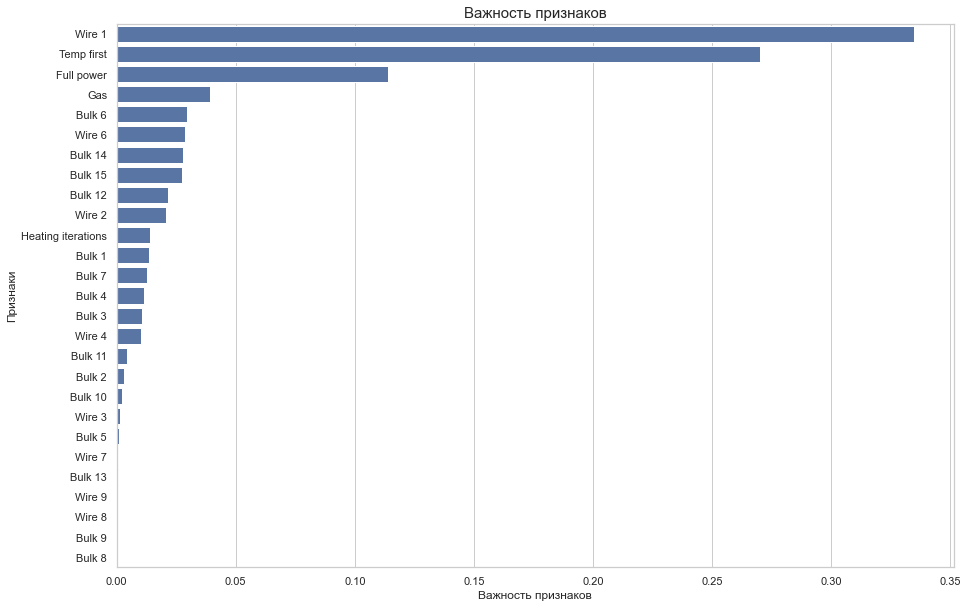

Wall time: 1min 7s


In [46]:
%%time
best_params_rfr = rfr_gridsearchcv(features_data_train, target_data_train)

### LightGBM

In [47]:
import lightgbm as lgb

def lgbm_gridsearchcv(features, target):
    '''Функция рассчитывает и выдает словарь с лучшими гиперпараметрами 
    и лучшее значение метрики для модели LGBMRegressor.
    
    Args:
        features(DataFrame, Series): Признаки.
        target(DataFrame, Series): Целевой(ые) признак(и).
    '''
    model = lgb.LGBMRegressor()
    param_grid = {
            'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
            'objective': ['regression'],
            'n_estimators': [800],
            'learning_rate': [0.001, 0.01, 0.02, 0.03],
            'max_depth': np.arange(2, 10),
            'random_state': [42], 
            'num_iterations':[500]
    }
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv= 3, scoring = 'neg_mean_absolute_error')
    CV.fit(features, target)
    print('Лучшие гиперпараметры: ', CV.best_params_)
    print('Лучшее MAE: {:.2f}'.format(-CV.best_score_))
    # строим график важности признаков
    importance_bar(CV.best_estimator_.feature_importances_, features.columns.values)
    return CV.best_params_ 

Подберем лучшие гиперпараметры для модели LGBMRegressor, оценим лучший показатель MAE и построим график важности признаков для модели с лучшими гиперпараметрами.

In [ ]:
%%time
best_param_lgbmregressor = lgbm_gridsearchcv(features_data_train, target_data_train)

Гиперпараметры подобраны. Лучшее значение MAE 6.50 на обучающей выборке показала модель LGBMRegressor. Среди признаков, наиболее влияющих на модели можно выделить: Full Power (полная мощность за все итерации) и Temp first (первое измерение температуры в партии).

### Вывод

Мы провели кросс-валидацию обучающей выборки и подобрали для моделей лучшие гиперпараметры. Лучшее значение MAE на обучающей выборке показала модель LGBMRegressor. Также среди признаков удалось выделить те, которые больше всего влияют на модели.

# 3. Финальный анализ моделей <a id = "3."> </a>

[Вернуться к плану работы](#plan)

In [ ]:
from sklearn.metrics import mean_absolute_error

def ml(model, features_train, target_train, features_test, target_test):
    '''Функция обучает заданную модель по обучающей выборке 
    и расчитывает метрику MAE по тестовой выборке.
    
    Args:
        model(Estimator): Модель.
        features_train(DataFrame, Series): Признак(и) обучающей выборки.
        target_train(DataFrame, Series): Целевой(ые) признак(и) обучающей выборки.
        features_test(DataFrame, Series): Признак(и) тестовой выборки.
        target_test(DataFrame, Series): Целевой(ые) признак(и) тестовой выборки.
    '''
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    # считаем MAE модели
    mae = mean_absolute_error(target_test, predictions)
    print('MAE модели: ', round(mae, 2))
    # считаем MAE naive модели
    mean = target_data_train.mean()
    lenght = features_data_test.shape[0]
    pred_naive = np.full((lenght,1), mean)
    mae_naive = mean_absolute_error(target_test, pred_naive)
    print('MAE naive: ', round(mae_naive, 2))
    # строим график важности признаков
    importance_bar(model.feature_importances_, features_train.columns.values)

Проведем финальную проверку модели LGBMRegressor на тестовой выборке, оценим показатель MAE и построим график важности признаков для финальной модели.

In [ ]:
model_lgb = lgb.LGBMRegressor(**best_param_lgbmregressor)
ml(model_lgb, features_data_train, target_data_train, features_data_test, target_data_test)

### Вывод

Мы провели финальное тестирование. Модель показала результат MAE 6.02, что соответствует условию решения задачи. Также модель предсказывает лучше, чем наивная модель со средними значениями.

## ИТОГ

Были проанализированы и обединены данные, обработаны выбросы и пропуски. Количественные признаки были масштабированы. Для целей предсказания температуры использовались 3 модели LinearRegression, RandomForestRegressor и LGBMRegressor, которые показали отличный результат, по сравнению с наивной моделью. В результате оценки метрики MAE и подбора гиперпараметров победила модель LGBMRegressor, финальное тестирование которой показало MAE в 6.02. Также удалось выделить признаки, которые больше всего влияют на модель: Full Power (полная мощность за все итерации) и Temp first (первое измерение температуры в партии), что выглядит логично. Получается управляю начальной температурой и мощностью нагрева на каждой итерации мы можем управлять энергозатратами и эффективно их распределять для каждой партии. Для дальнейшего анализа необходимо будет наблюдать показатели и выявлять отклонения от средних значений и фиксировать причины: состав газа, стали, начальную тепературу и т.д. Зафиксировав причины можно будет разрабатывать мероприятия по энергосбережению.